## Supplementary Information

# Planar cell polarity-mediated induction of neural stem cell expansion during axolotl spinal cord regeneration


Aida Rodrigo Albors<sup>1,2\*</sup>, Akira Tazaki<sup>1\*</sup>, Fabian Rost<sup>3</sup>, Sergek Nowoshilow<sup>1,2*</sup>, Osvaldo Chara<sup>3,4</sup>, Elly M. Tanaka<sup>1+</sup>

<sup>1</sup>Deutsche Forschungsgemeinschaft (DFG)–Center for Regenerative Therapies Dresden, Technische Universität Dresden, Germany.<br>
<sup>2</sup>Max Planck Institute of Molecular Cell Biology and Genetics, Dresden, Germany.<br>
<sup>3</sup>Center for Information Services and High Performance Computing, Technische Universität Dresden, Germany.<br>
<sup>4</sup>Institute of Physics of Liquids and Biological Systems (IFLYSIB), Consejo Nacional de Investigaciones Científicas y Técnicas (CONICET) and University of La Plata, Argentina.

<sup>*</sup> equal contribution<br>
<sup>+</sup> corresponding author

http://dx.doi.org/10.7554/eLife.10230

Correspondence:<br>
Elly M. Tanaka<br>
CRTD<br>
Fetscherstraβe 105, 01307 Dresden, Germany<br>
Tel. +49 351 458-82000<br>
Fax +49 351 458-82009<br>
E-mail: elly.tanaka@crt-dresden.de

## Content

* Introduction
* Mitotic index
* Cell cycle length and cell cycle parameters analysis

## Introduction

These notebooks was used to perform data analyses presented in ([Rodrigo Albors et al., 2015](http://dx.doi.org/10.7554/eLife.10230)). It contains all the data and the code for the calculations to estimate the mitotic index, cell cycle length and and cell cycle parameters. Each section in this notebook corresponds to the methods section of the main article that has the same name.

Information on how to execute this interactive notebooks can be found on the [IPython Notebook](http://ipython.org/notebook.html) website. We used the following python modules for our analysis:
* [SciPy](http://www.scipy.org/scipylib/index.html)
* [pandas](http://pandas.pydata.org/)
* [matplotlib](http://matplotlib.org/)
* [iminuit](https://github.com/iminuit/iminuit)
* [probfit](https://github.com/iminuit/probfit)

In [1]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import probfit
import iminuit
import warnings

## Estimation of mitotic index 

### Cell length data

The following pandas DataFrame contains the measurements of anterior-posterior cell lengths of randomly chosen cells from 3 different cell populations (uninjured, regenerating and non-regenerating at 3 days after amputation, see Fig. 2e). 3 biological replicates per cell population were measured.

|Column name|Definition|
|-|-|
|ID|ID of the biological replicate.|
|time|time in days after amputation.|
|cell population|the cell population from which the cells were chosen|
|cell length|length of individual cells in the anterior-posterior direction|

In [2]:
cell_length_data = pd.DataFrame()
cell_length_data['ID'] = [u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured1', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured2', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'uninjured3', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_1', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_2', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3', u'day3_3']
cell_length_data['time'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
cell_length_data['cell_population'] = ['uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating', u'non-regenerating']
cell_length_data['cell_length'] = [13.430999999999999, 15.132, 11.340999999999999, 12.629, 12.177, 14.395, 15.173, 13.153, 12.595000000000001, 15.773999999999999, 12.263, 14.34, 12.595000000000001, 15.132, 14.667, 14.242000000000001, 14.667, 11.728999999999999, 12.574, 13.404, 13.430999999999999, 13.532, 16.097000000000001, 11.766999999999999, 13.877000000000001, 13.877000000000001, 14.567, 13.51, 11.092000000000001, 14.912000000000001, 13.51, 13.945, 16.638000000000002, 14.545999999999999, 13.602, 11.782, 11.092000000000001, 13.259, 12.875, 11.808, 14.567, 13.651, 13.842000000000001, 15.362, 14.201000000000001, 14.567, 15.583, 13.384, 15.284000000000001, 12.308, 14.789, 13.377000000000001, 11.993, 11.531000000000001, 12.914999999999999, 16.151, 12.454000000000001, 12.914999999999999, 12.914999999999999, 16.143999999999998, 10.609, 13.384, 12.473000000000001, 12.459, 12.800000000000001, 12.454000000000001, 14.529999999999999, 13.492000000000001, 12.459, 12.108000000000001, 13.842000000000001, 12.454000000000001, 12.454000000000001, 12.128, 12.108000000000001, 12.108000000000001, 12.805, 13.842000000000001, 14.529999999999999, 12.454000000000001, 12.459, 12.108000000000001, 15.69, 14.298999999999999, 11.531000000000001, 11.156000000000001, 13.503, 13.407999999999999, 16.143999999999998, 12.914999999999999, 13.837999999999999, 15.222, 14.298999999999999, 13.384, 13.377000000000001, 14.766999999999999, 12.462999999999999, 11.541, 13.837999999999999, 12.454000000000001, 12.923, 15.683, 13.837999999999999, 13.837999999999999, 12.914999999999999, 12.454000000000001, 13.15, 11.531000000000001, 11.993, 14.298999999999999, 12.948, 15.710000000000001, 14.76, 12.923, 12.488, 12.914999999999999, 11.766999999999999, 12.800000000000001, 14.183999999999999, 12.459, 13.186999999999999, 10.384, 12.108000000000001, 11.436999999999999, 11.782, 12.151999999999999, 11.07, 11.420999999999999, 12.128, 13.146000000000001, 13.496, 10.43, 11.247, 11.635, 13.497, 10.648999999999999, 13.474, 11.763999999999999, 12.488, 12.702999999999999, 13.801, 12.473000000000001, 11.818, 11.763999999999999, 13.146000000000001]

A plot of the mean anterior-posterior cell lengths for the 9 different biological replicates/cell populations shows that it stays approximately constant, independent of the population the cells were taken from (error bars standard error of the mean):

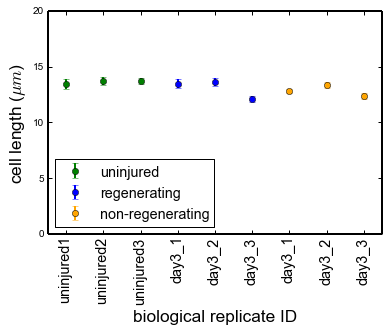

In [3]:
colors = {'uninjured': 'green',
         'regenerating': 'blue',
         'non-regenerating': 'orange'}
i = 0
xticklabels = []
pitems = {}

for pop in ['uninjured', 'regenerating', 'non-regenerating']:
    popdata = cell_length_data.query('cell_population == @pop')
    for ID in popdata['ID'].unique():
        xticklabels.append(ID)
        IDdata = popdata.query('ID == @ID')
        pitems[(pop, ID)] = plt.errorbar(i, IDdata['cell_length'].mean(), IDdata['cell_length'].sem(),\
                 color = colors[pop], elinewidth = 2,  fmt = 'o')
        
        i +=1

pitems[('uninjured', 'uninjured1')].set_label('uninjured')
pitems[('regenerating', 'day3_1')].set_label('regenerating')
pitems[('non-regenerating', 'day3_1')].set_label('non-regenerating')

plt.legend(loc = 0, numpoints = 1, fontsize = 'x-large')

plt.xticks(sp.arange(len(xticklabels)), xticklabels, fontsize = 'x-large', rotation = 90)
plt.xlim(-0.5, 8.5)
plt.ylim(0, 20)
plt.xlabel('biological replicate ID', fontsize = 'xx-large')
plt.ylabel('cell length ($\mu m$)', fontsize = 'xx-large')
plt.show()

Below the mean anterior-posterior cell length and its standard error are calculated:

In [4]:
cell_length_mean = cell_length_data['cell_length'].mean()
cell_length_sem = cell_length_data['cell_length'].sem()
print('mean anterior-posterior cell length: {0:.1f}+-{1:.1f} µm.'\
      .format(cell_length_mean, cell_length_sem))

mean anterior-posterior cell length: 13.2+-0.1 µm.


### Section length

Sections of the spinal cord have a length of 50 $\mu$m.

In [5]:
section_length = 50.0

### Cell number data

The following pandas DataFrame contains all data of number of mitotic cells and number of proliferating progenitor cells. Missing data is represented by sp.nan. The columns are defined as follows:


|Column Name|Definition|
|-|-|
|ID|ID of the biological replicate.|
|time|time in days after amputation.|
|pos|position of the section along the anterior-posterior axis. 0 is at the amputation plane and grows for more posterior positions.|
|m|Number of mitotic cells in a section.|
|PCNA|Number of proliferating progenitor cells in a cross section.|


In [6]:
cell_number_data = pd.DataFrame()
cell_number_data["ID"] = ['0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_1', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_2', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '0D_3', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_1', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_2', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '3D_3', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_1', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_2', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '4D_3', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_1', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_2', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '6D_3', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_1', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_2', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3', '8D_3']
cell_number_data["time"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
cell_number_data["pos"] = [0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -900.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1450.0, -1500.0, -1550.0, -1600.0, -1650.0, -1700.0, -1750.0, -1800.0, -1850.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, -1550.0, -1600.0, -1650.0, -1700.0, -1750.0, -1800.0, -1850.0, -1900.0, -1950.0, -2000.0, -2050.0, -2100.0, -2150.0, -2200.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1400.0, -1450.0, -1500.0, -1550.0, -1600.0, -1650.0, -1700.0, -1750.0, -1800.0, -1850.0, -1900.0, -1950.0, -2000.0, -2050.0, -2100.0, -2150.0, -2200.0, -2250.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 250.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, 700.0, 650.0, 600.0, 550.0, 450.0, 400.0, 350.0, 300.0, 250.0, 200.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, -1550.0, -1600.0, -1650.0, -1700.0, -1750.0, -1800.0, -1850.0, -1900.0, -2000.0, 800.0, 750.0, 700.0, 650.0, 600.0, 550.0, 500.0, 450.0, 400.0, 350.0, 300.0, 250.0, 200.0, 150.0, 100.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -550.0, -600.0, -650.0, -700.0, -750.0, -800.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, -1550.0, -1600.0, -1650.0, -1700.0, -1750.0, -1800.0, -1850.0, -1900.0, -1950.0, -2000.0, -2050.0, -2100.0, -2150.0, -2200.0, -2250.0, -2300.0, 550.0, 500.0, 450.0, 400.0, 350.0, 300.0, 250.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -650.0, -700.0, -750.0, -800.0, -850.0, -900.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1450.0, -1500.0, -1550.0, -1600.0, 2150.0, 2100.0, 2050.0, 1950.0, 1900.0, 1850.0, 1800.0, 1750.0, 1700.0, 1650.0, 1600.0, 1550.0, 1450.0, 1400.0, 1350.0, 1300.0, 1150.0, 1100.0, 1050.0, 950.0, 900.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0, 550.0, 500.0, 450.0, 400.0, 350.0, 300.0, 250.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -600.0, -650.0, -700.0, -750.0, -800.0, -850.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1250.0, -1300.0, 2100.0, 2050.0, 2000.0, 1950.0, 1900.0, 1850.0, 1800.0, 1750.0, 1700.0, 1650.0, 1600.0, 1550.0, 1500.0, 1450.0, 1400.0, 1350.0, 1300.0, 1250.0, 1150.0, 1100.0, 1050.0, 1000.0, 950.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0, 550.0, 500.0, 450.0, 350.0, 300.0, 250.0, 200.0, 150.0, 100.0, 50.0, 0.0, -50.0, -100.0, -150.0, -200.0, -250.0, -300.0, -350.0, -400.0, -450.0, -500.0, -550.0, -600.0, -650.0, -700.0, -750.0, -900.0, -950.0, -1000.0, -1100.0, -1150.0, -1200.0, -1250.0, -1300.0, -1350.0, -1400.0, -1550.0, -1600.0, 1550.0, 1500.0, 1400.0, 1350.0, 1300.0, 1250.0, 1200.0, 1150.0, 1100.0, 1050.0, 1000.0, 950.0, 900.0, 850.0, 800.0, 750.0, 700.0, 650.0, 600.0, 550.0, 500.0, 450.0, 400.0, 350.0, 300.0, 250.0, 200.0, 50.0, 0.0, -50.0, -100.0, -150.0, -250.0, -300.0, -350.0, -400.0, -500.0, -600.0, -650.0, -700.0, -800.0, -850.0, -950.0, -1000.0, -1050.0, -1100.0, -1150.0, -1250.0, -1300.0, -1350.0, -1400.0, -1500.0, -1550.0, -1600.0, -1700.0, -1750.0, -1800.0, -1850.0, -1900.0, -1950.0, -2000.0]
cell_number_data["m"] = [0.0, 1.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 0.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 4.0, 0.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 4.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 0.0, 3.0, 2.0, 2.0, 3.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 3.0, 0.0, 2.0, 3.0, 0.0, 2.0, 2.0, 4.0, 0.0, 1.0, 4.0, 2.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 4.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 2.0, 0.0, 1.0, sp.nan, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 5.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 4.0, 4.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 4.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 4.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 5.0, 6.0, 4.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 6.0, 5.0, 1.0, 4.0, 5.0, 7.0, 2.0, 4.0, 2.0, 3.0, 5.0, 4.0, 1.0, 0.0, 3.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 5.0, 1.0, 5.0, 3.0, 3.0, 2.0, 3.0, 6.0, 3.0, 4.0, 5.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 8.0, 3.0, 5.0, 1.0, 3.0, 3.0, 1.0, 4.0, 3.0, 0.0, 3.0, 0.0, 2.0, 2.0, 1.0, 1.0, 1.0, 4.0, 6.0, 4.0, 4.0, 6.0, 5.0, 2.0, 7.0, 3.0, 2.0, 2.0, 3.0, 6.0, 7.0, 4.0, 6.0, 4.0, 7.0, 5.0, 4.0, 2.0, 1.0, 3.0, 4.0, 1.0, 2.0, 4.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 5.0, 1.0, 3.0, 7.0, 7.0, 4.0, 7.0, 6.0, 8.0, 7.0, 3.0, 3.0, 2.0, 1.0, sp.nan, 6.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 1.0, 0.0, 3.0, 4.0, 2.0, 2.0, 1.0, 1.0, 0.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 0.0, 2.0, 5.0, 6.0, 3.0, 3.0, 2.0, 5.0, 6.0, 7.0, 2.0, 6.0, 3.0, 6.0, 8.0, 2.0, 7.0, 8.0, 4.0, 5.0, 6.0, 2.0, 1.0, 5.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 0.0, 0.0, 4.0, 4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 0.0, 1.0, 5.0, 2.0, 2.0, 5.0, 1.0, 1.0, 5.0, 6.0, 5.0, 5.0, 1.0, 3.0, 2.0, 1.0, 5.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 0.0, 2.0, 3.0, 4.0, 3.0, 5.0, 0.0, 3.0, 2.0, 3.0, 1.0, 1.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 2.0, 1.0, 5.0, 4.0, 3.0, 6.0, 4.0, 6.0, 1.0, 1.0, 0.0, 3.0, 7.0, 5.0, 6.0, 3.0, 4.0, 5.0, 4.0, 4.0, 4.0, 3.0, 6.0, 8.0, 3.0, 1.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 6.0, 3.0, 4.0, 4.0, 3.0, sp.nan, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 1.0, 5.0, 2.0, 4.0, 4.0, 5.0, 3.0, 2.0, 2.0, 3.0, 3.0, 6.0, 7.0, 2.0, 5.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 5.0, 4.0, 5.0, 3.0, 4.0, 1.0, 4.0, 4.0, 3.0, 4.0, 7.0, 7.0, 5.0, 5.0, 7.0, 3.0, 5.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, sp.nan, 1.0, 1.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 6.0, 4.0, 6.0, 5.0, 6.0, 6.0, 7.0, 4.0, 6.0, 5.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 6.0, 3.0, 5.0, 3.0, 2.0, 5.0, 2.0, 1.0, 2.0, 2.0, 5.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 0.0, 1.0, 3.0, 1.0, 4.0, 2.0, 3.0, 1.0, sp.nan, 1.0, 2.0, 1.0, 3.0, 3.0, 5.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0]
cell_number_data["PCNA"] = [sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, 27.0, 29.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 27.0, 32.0, sp.nan, sp.nan, sp.nan, 28.0, 30.0, 32.0, sp.nan, 31.0, sp.nan, 32.0, 26.0, sp.nan, sp.nan, sp.nan, sp.nan, 27.0, sp.nan, 32.0, sp.nan, sp.nan, sp.nan, 30.0, sp.nan, 26.0, 28.0, sp.nan, sp.nan, sp.nan, 26.0, 30.0, sp.nan, sp.nan, 27.0, 30.0, 28.0, sp.nan, sp.nan, sp.nan, 30.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 26.0, 21.0, sp.nan, sp.nan, 22.0, sp.nan, 26.0, 22.0, sp.nan, 21.0, 26.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 31.0, 28.0, sp.nan, sp.nan, sp.nan, 31.0, 26.0, sp.nan, sp.nan, sp.nan, 23.0, 29.0, 30.0, sp.nan, 26.0, 29.0, sp.nan, sp.nan, sp.nan, sp.nan, 24.0, 26.0, 25.0, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 25.0, sp.nan, sp.nan, 22.0, sp.nan, sp.nan, 32.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 26.0, 29.0, 30.0, sp.nan, sp.nan, 31.0, sp.nan, 28.0, 24.0, 28.0, 24.0, 25.0, 21.0, sp.nan, sp.nan, 21.0, 24.0, sp.nan, sp.nan, sp.nan, sp.nan, 20.0, 23.0, sp.nan, 21.0, sp.nan, sp.nan, sp.nan, sp.nan, 22.0, sp.nan, sp.nan, 17.0, 20.0, sp.nan, sp.nan, sp.nan, 20.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 18.0, sp.nan, sp.nan, 28.0, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, 26.0, 31.0, sp.nan, 26.0, sp.nan, sp.nan, 27.0, sp.nan, sp.nan, sp.nan, sp.nan, 23.0, 23.0, sp.nan, 27.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 29.0, 27.0, sp.nan, sp.nan, sp.nan, sp.nan, 25.0, sp.nan, 25.0, 26.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, 32.0, 36.0, 28.0, 33.0, sp.nan, 31.0, sp.nan, 33.0, sp.nan, 34.0, sp.nan, 29.0, sp.nan, sp.nan, 28.0, sp.nan, 29.0, sp.nan, sp.nan, 27.0, sp.nan, 26.0, 24.0, 25.0, 26.0, sp.nan, sp.nan, 22.0, 23.0, 24.0, sp.nan, 28.0, 29.0, 28.0, 28.0, 28.0, 28.0, 26.0, sp.nan, 29.0, sp.nan, 34.0, 26.0, sp.nan, 28.0, sp.nan, 34.0, sp.nan, sp.nan, 28.0, sp.nan, 27.0, sp.nan, sp.nan, 24.0, sp.nan, 20.0, sp.nan, sp.nan, 23.0, 22.0, 25.0, sp.nan, sp.nan, 23.0, 26.0, 35.0, 33.0, 29.0, 34.0, 31.0, 31.0, sp.nan, 30.0, 29.0, 34.0, sp.nan, sp.nan, 32.0, 29.0, 26.0, 31.0, sp.nan, 32.0, sp.nan, 28.0, sp.nan, sp.nan, 23.0, sp.nan, 25.0, sp.nan, sp.nan, 27.0, sp.nan, 26.0, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, 32.0, sp.nan, 35.0, sp.nan, 30.0, 30.0, 26.0, 26.0, sp.nan, 31.0, 34.0, 32.0, 35.0, 29.0, sp.nan, 29.0, 30.0, 35.0, 30.0, 32.0, 29.0, 32.0, sp.nan, sp.nan, 29.0, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, 24.0, sp.nan, sp.nan, sp.nan, 31.0, sp.nan, sp.nan, 27.0, sp.nan, 27.0, 29.0, sp.nan, sp.nan, 28.0, 29.0, sp.nan, sp.nan, 32.0, 32.0, sp.nan, 34.0, 24.0, sp.nan, 33.0, 30.0, sp.nan, 26.0, sp.nan, sp.nan, 30.0, 27.0, sp.nan, sp.nan, 27.0, 29.0, 33.0, 32.0, 27.0, 26.0, 36.0, 34.0, 35.0, 34.0, sp.nan, 36.0, 31.0, sp.nan, 36.0, sp.nan, 34.0, 35.0, 34.0, sp.nan, sp.nan, sp.nan, sp.nan, 34.0, 31.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, 29.0, sp.nan, 29.0, 28.0, sp.nan, 26.0, 27.0, 25.0, sp.nan, 26.0, 35.0, 30.0, sp.nan, 29.0, sp.nan, 29.0, 32.0, 31.0, sp.nan, sp.nan, 23.0, sp.nan, 22.0, sp.nan, 29.0, 25.0, sp.nan, 26.0, 25.0, sp.nan, sp.nan, 29.0, 31.0, 35.0, 25.0, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, 29.0, 30.0, sp.nan, 31.0, sp.nan, 28.0, 32.0, 28.0, sp.nan, 27.0, 25.0, 30.0, sp.nan, 23.0, sp.nan, 29.0, 34.0, sp.nan, 25.0, sp.nan, 25.0, sp.nan, 33.0, 30.0, sp.nan, sp.nan, 32.0, sp.nan, 30.0, sp.nan, 31.0, 29.0, 30.0, sp.nan, sp.nan, sp.nan, 32.0, 30.0, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, 31.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, 33.0, 34.0, 32.0, 29.0, 30.0, 30.0, sp.nan, 30.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 27.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 29.0, 30.0, sp.nan, sp.nan, 28.0, sp.nan, 28.0, sp.nan, sp.nan, 27.0, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, 30.0, sp.nan, sp.nan, sp.nan, sp.nan, 31.0, 31.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 32.0, sp.nan, sp.nan, 29.0, sp.nan, sp.nan, 33.0, sp.nan, sp.nan, sp.nan, 31.0, 29.0, sp.nan, 34.0, 33.0, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, 27.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 36.0, sp.nan, sp.nan, 32.0, 28.0, sp.nan, 32.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 29.0, sp.nan, 29.0, 28.0, 34.0, sp.nan, 29.0, 31.0, sp.nan, sp.nan, sp.nan, sp.nan, 30.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 28.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan, 29.0, 31.0, 28.0, 31.0, 28.0, 27.0, 29.0, sp.nan, sp.nan, sp.nan, sp.nan, 27.0, sp.nan, 26.0, sp.nan, sp.nan, sp.nan, sp.nan, sp.nan]

### Mitotic index

The following function calculates the mean mitotic index and its standard error in a specific region delimited by the two positions lmin and lmax for all biological replicates.

In [7]:
def calc_all_mi(cell_number_data, lmin, lmax):
    """ Calculate the mean mitotic index and standard error of the mean
        in a specific region delimited by the two positions lmin and lmax
        for all biological replicates.
    """
    
    def sem_finite(data):
        """ Calculate the standard error of the mean for a pandas series
            with finite population size correction assuming the length of
            the series corresponds to the population size.
        """
        sem = data.sem()
        # nstotal is the population size
        nstotal = float(len(data))
        # ns is the number of samples
        ns = float(data.count())
        # calculate standard error of the mean with finite
        # population size correction (sem_finite):
        sem_finite = sem * sp.sqrt((nstotal - ns)/ (nstotal - 1))
        return sem_finite
    
    # filter the data according to lmin, lmax
    data = cell_number_data.query('@lmin <= pos <= @lmax').copy()
    # calculate number of proliferating cells in each section
    data['Np'] = data['PCNA'] * section_length / cell_length_mean
    # calculate mitotic index in each section
    data['mi'] = data['m'] / data['Np']
    
    # only consider replicates for which at least 3 sections were measured
    # in the specified region
    grouped = data[['ID', 'time', 'mi']].groupby('ID')
    data = grouped.filter(lambda x: len(x['mi'].dropna()) >= 3)
    
    # calculate mean mitotic index and standard error of the mean 
    grouped = data[['ID', 'time', 'mi']].groupby('ID')
    all_mi = grouped.agg({'time': [sp.unique],
                                      'mi': ['mean', sem_finite]})
    data_per_replicate = pd.DataFrame()
    data_per_replicate['time'] = all_mi['time', 'unique']
    data_per_replicate['mi'] = all_mi['mi', 'mean']
    data_per_replicate['mi_replicate_delta'] = all_mi['mi', 'sem_finite']
    return data_per_replicate

The following function calculates the mean (over all biological replicates) mitotic index at a given time in a given region.

In [8]:
def calc_mean_mi_float(cell_number_data, t, lmin, lmax):
    """ Calculate the mean (over all biological replicates) mitotic index
        at a given time t in a given region [lmin, lmax].
    """
    
    # filter the data according to time
    data = cell_number_data.query('time == @t').copy()
    
    # calculate the mitotic index for all replicates at time                              
    data_per_replicate = calc_all_mi(data, lmin, lmax)
    
    # calculate the mean mitotic index
    mi = data_per_replicate['mi'].mean()
    # calculate the error of the mitotic index as the sum of intra-
    # and interexperimental error
    mi_delta = data_per_replicate['mi_replicate_delta'].mean() + data_per_replicate['mi'].sem()

    return mi, mi_delta

# vectorize the function for time such that the mitotic index can be
# calculated for an array of multiple time points
calc_mean_mi = sp.vectorize(calc_mean_mi_float, excluded=[0, 2, 3])

### Mean mitotic index time course

Here the mean mitotic index timecourse in the region 500 µm anterior to the amputation plane up to the tip is calculated (Fig. 2d).

In [9]:
time = cell_number_data['time'].unique()
mi, mi_delta = calc_mean_mi(cell_number_data, time, -500, sp.inf)

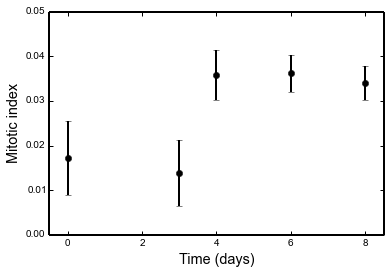

In [10]:
plt.errorbar(time, mi, mi_delta, fmt='o', color = 'black')
plt.xlim(-0.5, 8.5)
plt.ylim(0, 0.05)
plt.xlabel('Time (days)', fontsize = 'x-large')
plt.ylabel('Mitotic index', fontsize = 'x-large')
plt.show()

## Cell cycle length and cell cycle parameters analysis

### Estimation of cell cycle length, S-Phase length and growth fraction from cumulative BrdU labeling data

Here, the cell cycle length, length of S-Phase and growth fraction for uninjured, non-regenerating and regenerating cell populations are estimated (Fig. 2e).

### Fraction of BrdU-labeled cells data

The following pandas DataFrame contains the data of the fraction of BrdU-labeled cells for different cell populations and different times of continuous BrdU treatment. Missing data is represented by sp.nan. The columns are defined as follows:


|Column Name|Definition|
|-|-|
|time|time after start of BrdU injections|
|labeling_fraction|the fraction of BrdU-labeled cells|
|cell population|specific cell population under study (uninjured, non-regenerating or regenerating, see Fig. 2e)|


In [11]:
lf_data = pd.DataFrame()
lf_data['time'] = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 308.0, 308.0, 308.0, 308.0, 308.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 123.0, 123.0, 123.0, 123.0, 170.0, 170.0, 170.0, 170.0, 170.0, 220.0, 220.0, 220.0, 314.0, 314.0, 314.0, 314.0, 314.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 123.0, 123.0, 123.0, 123.0, 123.0]
lf_data['labeling_fraction'] = [0.313, 0.216, 0.39400000000000002, 0.36599999999999999, 0.31900000000000001, 0.36399999999999999, 0.26900000000000002, 0.248, 0.35199999999999998, 0.21299999999999999, 0.371, 0.47199999999999998, 0.44400000000000001, 0.46800000000000003, 0.34000000000000002, 0.36299999999999999, 0.34699999999999998, 0.32600000000000001, 0.5, 0.55800000000000005, 0.38400000000000001, 0.38300000000000001, 0.496, 0.51300000000000001, 0.54600000000000004, 0.60199999999999998, 0.67900000000000005, 0.68899999999999995, 0.44, 0.51100000000000001, 0.63200000000000001, 0.55500000000000005, 0.59399999999999997, 0.69199999999999995, 0.77500000000000002, 0.65900000000000003, 0.71399999999999997, 0.74299999999999999, 0.78400000000000003, 0.80100000000000005, 0.65300000000000002, 0.77100000000000002, 0.83799999999999997, 0.83499999999999996, 0.76900000000000002, 0.82799999999999996, 0.79100000000000004, 0.85299999999999998, 0.79900000000000004, 0.70299999999999996, 0.78700000000000003, 0.754, 0.78700000000000003, 0.84799999999999998, 0.79200000000000004, 0.248, 0.247, 0.34399999999999997, 0.441, 0.40000000000000002, 0.38400000000000001, 0.34799999999999998, 0.25900000000000001, 0.42399999999999999, 0.505, 0.42599999999999999, 0.5, 0.46300000000000002, 0.44900000000000001, 0.51400000000000001, 0.46300000000000002, 0.57199999999999995, 0.61399999999999999, 0.59499999999999997, 0.63, 0.63500000000000001, 0.64300000000000002, 0.67000000000000004, 0.60599999999999998, 0.54000000000000004, 0.54500000000000004, 0.59299999999999997, 0.56000000000000005, 0.55100000000000005, 0.59999999999999998, 0.72499999999999998, 0.70399999999999996, 0.59599999999999997, 0.55700000000000005, 0.67500000000000004, 0.629, 0.72299999999999998, 0.69299999999999995, 0.54100000000000004, 0.66300000000000003, 0.68400000000000005, 0.749, 0.76200000000000001, 0.65000000000000002, 0.61399999999999999, 0.81899999999999995, 0.83299999999999996, 0.83099999999999996, 0.74299999999999999, 0.77600000000000002, 0.83499999999999996, 0.82199999999999995, 0.83799999999999997, 0.79400000000000004, 0.86399999999999999, 0.70499999999999996, 0.59999999999999998, 0.61399999999999999, 0.64000000000000001, 0.70699999999999996, 0.67800000000000005, 0.70099999999999996, 0.65500000000000003, 0.64100000000000001, 0.70899999999999996, 0.78900000000000003, 0.752, 0.79600000000000004, 0.66800000000000004, 0.72499999999999998, 0.71599999999999997, 0.72899999999999998, 0.81299999999999994, 0.79900000000000004, 0.81499999999999995, 0.86799999999999999, 0.874, 0.77900000000000003, 0.76800000000000002, 0.871, 0.85399999999999998, 0.81299999999999994, 0.84099999999999997, 0.88900000000000001, 0.94999999999999996, 0.89900000000000002, 0.94899999999999995, 0.86599999999999999, 0.94199999999999995, 0.81499999999999995, 0.92400000000000004, 0.92100000000000004, 0.93999999999999995, 0.93500000000000005, 0.95099999999999996, 0.97199999999999998, 0.98899999999999999, 0.97699999999999998, 0.95599999999999996, 0.97699999999999998, 0.98399999999999999, 1.0, 0.98799999999999999, 1.0, 0.99199999999999999, 0.94499999999999995, 1.0, 1.0, 1.0, 0.97599999999999998, 0.97599999999999998, 0.95699999999999996]
lf_data['cell_population'] = ['uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating']

Here the standard deviation for each cell population and time point is estimated:

In [12]:
lf_data = lf_data.set_index(['cell_population', 'time'])
lf_data['delta'] = lf_data.groupby(level = ['cell_population', 'time']).std()
lf_data = lf_data.reset_index('time')

### Model of BrdU incorporation

A model based on the model for the BrdU-labeling fraction proposed by [Lefevre et al., 2013](http://dx.doi.org/10.1016/j.jtbi.2013.08.033) with an extension for an initial growth fraction  was used to estimate the cell cycle length parameters. It is implemented as follows:

In [13]:
def brdu_model(t, TS, TC, TG2M, r, GF):
    """ BrdU-labeling fraction model for BrdU incorporation in vivo.
        Based on Lefevre et al., 2013 and extended with an initial
        growth fraction.
        
        t    ... time after start of BrdU labeling
        TS   ... length of S-Phase
        TC   ... cell cycle length
        TG2M ... combined length of G2- and M-Phase
        r    ... mean number of daughter cells after cell division remaining
                 in the population
        GF   ... initial growth fraction
        
        Lefevre, J., Marshall, D. J., Combes, A. N., Ju, A. L., Little, M. H.
        & Hamilton, N. A. (2013). Modelling cell turnover in a complex tissue
        during development. Journal of Theoretical Biology, 338, 66-79.
    """
    
    if TS + TG2M > TC:
        return sp.nan
    else:
        if r==1:
            if t < TC - TS:
                return GF * (t + TS) / TC
            else:
                return GF
        else:
            # calculate the growth fraction at time t
            g = ( ( GF * r ** (t / TC) ) / ( GF * r ** (t / TC) + (1 - GF) ) )
            if t < TG2M:
                return  g * ((r ** ( ( TG2M + TS ) / TC ) - r ** (( TG2M - t ) / TC) ) / (r - 1.0) )
            elif t < TC - TS:
                return g * (1.0 - ( r ** ( ( TC + TG2M - t ) / TC ) - r ** ( ( TG2M  + TS) / TC ) ) / (r - 1.0) )
            else:
                return g

### Least-Square Fit

The parameters were estimated using the least squares method. Here the sum of squared errors (SSE) functions for the cell populations under study are defined:

In [14]:
SSE_functions = {}
for cell_population in lf_data.index.unique():
    SSE_functions[cell_population] = probfit.Chi2Regression(
                                  brdu_model,\
                                  sp.array(lf_data.loc[cell_population]['time']),\
                                  sp.array(lf_data.loc[cell_population]['labeling_fraction']),\
                                  sp.array(lf_data.loc[cell_population]['delta']))

The function migrad from the module iminuit will be used to minimize the SSE functions. For this function an initial parameter guess and an initial step size have to be defined. Furthermore, parameter limits are defined. The following arguments are used for all following minimization runs:

In [15]:
global_fitarg =   {'error_TS': 0.1,
                   'limit_TS': (0.0, 500.0),
                   'error_TC': 0.1,
                   'limit_TC': (20.0, 500.0),
                   'TG2M': 10.0,
                   'error_TG2M': 0.1,
                   'limit_TG2M': (0.0, 20.0),
                   'fix_r': True,
                   'error_r': 0.0,
                   'GF': 1.0,
                   'error_GF': 0.01,
                   'limit_GF': (0.0, 1.0)
                    }

For the uninjured and the non-regenerating cell populations $r=1$ is assumed while for the regenerating cell population $r=2$ is assumed:

In [16]:
r = {}
r['uninjured'] = 1.0
r['non-regenerating'] = 1.0
r['regenerating'] = 2.0

The following function minimizes a SSE function for a given initial guess of TS and TC, a fixed value of r and the remaining arguments given above:

In [17]:
def minimize_SSE(SSE, TS, TC, r, global_fitarg):
    # ignore warnings of minimization runs that go wrong
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        M = iminuit.Minuit(SSE, print_level= 0, TS = TS, TC = TC, r = r, **global_fitarg)
        # perform the minimization of SSE with migrad
        M.migrad()
        # check that the migrad results are valid
        if M.migrad_ok():
            # check if the reported error estimates are accurate
            if not M.matrix_accurate():
                # if not, try to estimate them accurately
                M.hesse()
            # check again if the reported error estimates are accurate
            if M.matrix_accurate():
                return M

The following function performs a systematic scan of initial guesses for TS and TC. For each initial guess the SSE function is minimized and the minuit object corresponding to the global minimum is returned:

In [18]:
def scan_model(SSE, r, global_fitarg, step):
    # boolean flag that is set to True if one valid minimization of
    # SSE was succesful
    one_fit_ok = False
    # systematically scan initial guesses for TS and TC
    for TC in sp.arange(0.0, 500.0, step):
        for TS in sp.arange(0.0, TC, step):
            # attempt to minimize the SSE
            M = minimize_SSE(SSE, TS, TC, r, global_fitarg)
            # check if the current attempt was succesful
            if M is None:
                # if not continue
                continue
            else:
                # check if a previous minimization was succesful
                if one_fit_ok:
                    # is the current minimization result smaller?
                    if M.fval < bestM.fval:
                        bestM = M
                else:
                    one_fit_ok = True
                    bestM = M
                
    if not one_fit_ok:
        raise Exception('No valid fit found!')

    return bestM

Perform the minimization for all cell populations:

In [19]:
best_fit = {}
print('')
for cell_population in lf_data.index.unique():
    best_fit[cell_population] = scan_model(SSE_functions[cell_population], r[cell_population], global_fitarg, 25.0)
    print cell_population
    best_fit[cell_population].print_fmin()


uninjured


FCN = 50.1646751226 
 TOTAL NCALL = 614 
 NCALLS = 614 
 
 
 EDM = 1.39663119032e-11 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,TS,1.300272e+02,1.341673e+01,0.000000e+00,0.000000e+00,0.0,500.0,
2,TC,3.240321e+02,2.093845e+01,0.000000e+00,0.000000e+00,20.0,500.0,
3,TG2M,1.000000e+01,1.493883e+01,0.000000e+00,0.000000e+00,0.0,20.0,
4,r,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
5,GF,7.960115e-01,1.088326e-02,0.000000e+00,0.000000e+00,0.0,1.0,


non-regenerating


FCN = 90.6517153186 
 TOTAL NCALL = 462 
 NCALLS = 462 
 
 
 EDM = 4.59962174885e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,TS,1.786826e+02,2.125314e+01,0.000000e+00,0.000000e+00,0.0,500.0,
2,TC,3.398492e+02,3.236176e+01,0.000000e+00,0.000000e+00,20.0,500.0,
3,TG2M,1.000000e+01,1.493510e+01,0.000000e+00,0.000000e+00,0.0,20.0,
4,r,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
5,GF,8.182269e-01,1.040229e-02,0.000000e+00,0.000000e+00,0.0,1.0,


regenerating


FCN = 55.063051836 
 TOTAL NCALL = 367 
 NCALLS = 367 
 
 
 EDM = 3.42391247681e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,TS,8.787628e+01,8.652465e+00,0.000000e+00,0.000000e+00,0.0,500.0,
2,TC,1.185735e+02,1.024656e+01,0.000000e+00,0.000000e+00,20.0,500.0,
3,TG2M,9.570688e-08,1.978856e+01,0.000000e+00,0.000000e+00,0.0,20.0,
4,r,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
5,GF,9.579241e-01,7.318532e-03,0.000000e+00,0.000000e+00,0.0,1.0,


### Plotting data and model with estimated parameter values

Here we calculate the mean and the standard deviation of the BrdU-labeled fraction of cells at each time point for each cell population:

In [20]:
plotdata = lf_data[['time', 'labeling_fraction']].reset_index().groupby(['cell_population', 'time'])\
           .agg(['mean', 'std']).reset_index('time')

Below, the experimental data and model with estimated parameter values are plotted (see Fig. 2f):

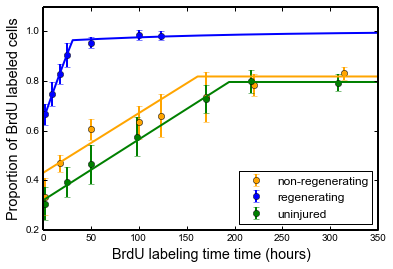

In [21]:
def unwrapper(M):
    v = M.values
    return v['TS'], v['TC'], v['TG2M'], v['r'], v['GF']

plottime = sp.arange(0, 500, 0.1)

for cell_population in plotdata.index.unique():
    plt.errorbar(plotdata.loc[cell_population]['time'], plotdata.loc[cell_population]['labeling_fraction', 'mean'],\
                 plotdata.loc[cell_population]['labeling_fraction', 'std'],\
                 color = colors[cell_population], fmt = 'o', label = cell_population)
    plt.plot(plottime,\
             sp.vectorize(brdu_model, excluded = [1, 2, 3, 4, 5])(plottime, *unwrapper(best_fit[cell_population])),\
             color=colors[cell_population])

plt.xlabel('BrdU labeling time time (hours)', fontsize = 'x-large')
plt.ylabel('Proportion of BrdU labeled cells', fontsize = 'x-large')
plt.xlim(0, 350)

plt.legend(loc = 0, numpoints = 1)

plt.show()

## Combined length of G2- and M-Phase

The combined length of G2- an M-Phase was estimated to be 9 hours.

In [22]:
TG2M = 9.0

## Estimation of M-Phase and G1-Phase lengths

### M-Phase length

The M-phase length was estimated by $T_M = mi \cdot T_C$. The specific cell populations under study are defined by a time after amputation and two positions $l_{min}$ and $l_{max}$ along the anterior-posterior axis:

In [23]:
#                    cell population     time  lmin      lmax
time_and_regions = {'uninjured'       : [0,    -sp.inf,  sp.inf],
                    'regenerating'    : [6,          0,  sp.inf],
                    'non-regenerating': [6,    -sp.inf,   -1000]}

The following function estimates the length of M-Phase and its error:

In [24]:
def calc_TM(cell_population):
    # TC from the BrdU data least square estimate 
    TC, TC_delta = best_fit[cell_population].values['TC'], best_fit[cell_population].errors['TC']
    # calculate the mitotic index for the specific cell population under study
    mi, mi_delta = calc_mean_mi(cell_number_data, *time_and_regions[cell_population])
    # calculate M-phase length
    TM = mi * TC
    # estimate the 1-sigma error with linear error propagation
    TM_delta = TM * (mi_delta / mi + TC_delta / TC)
    
    return TM, TM_delta

### Length of G1 phase

Calculation of length of G1 phase:

In [25]:
def calc_TG1(cell_population):
    TS, TS_delta = best_fit[cell_population].values['TS'], best_fit[cell_population].errors['TS']
    TC, TC_delta = best_fit[cell_population].values['TC'], best_fit[cell_population].errors['TC']

    TG1 = TC - TS - TG2M
    TG1_delta = TC_delta + TS_delta 
    return TG1, TG1_delta

## Summary: all phases 

Calculate and print the result for all cell cycle phases:

In [26]:
cell_cycle_phase = pd.DataFrame()
for cell_population in lf_data.index.unique():
    TS, TS_delta = best_fit[cell_population].values['TS'], best_fit[cell_population].errors['TS']
    TC, TC_delta = best_fit[cell_population].values['TC'], best_fit[cell_population].errors['TC']
    TM, TM_delta = calc_TM(cell_population)
    TG1, TG1_delta = calc_TG1(cell_population)
    TG2 = TG2M - TM
    TG2_delta = TM_delta

    cell_cycle_phase.loc[cell_population, 'TC'] = TC
    cell_cycle_phase.loc[cell_population, 'TC_delta'] = TC_delta
    cell_cycle_phase.loc[cell_population, 'TG1'] = TG1
    cell_cycle_phase.loc[cell_population, 'TG1_delta'] = TG1_delta
    cell_cycle_phase.loc[cell_population, 'TS'] = TS
    cell_cycle_phase.loc[cell_population, 'TS_delta'] = TS_delta
    cell_cycle_phase.loc[cell_population, 'TG2'] = TG2
    cell_cycle_phase.loc[cell_population, 'TG2_delta'] = TG2_delta    
    cell_cycle_phase.loc[cell_population, 'TM'] = TM
    cell_cycle_phase.loc[cell_population, 'TM_delta'] = TM_delta

In [27]:
sp.around(cell_cycle_phase)

,TC,TC_delta,TG1,TG1_delta,TS,TS_delta,TG2,TG2_delta,TM,TM_delta
uninjured,324,21,185,34,130,13,3,3,6,3
non-regenerating,340,32,152,54,179,21,2,3,7,3
regenerating,119,10,22,19,88,9,5,1,4,1
